<a href="https://colab.research.google.com/github/arturomf94/ce-mia/blob/master/tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy

In [0]:
#### Evolutionary Algorithm to Solve an N-Queens Problem
import numpy as np
import random
import math
from collections import Counter
import statistics
import matplotlib.pyplot as plt

In [0]:
### Permutation Solution

## Parameters:
runs = 30
generations = 10000
P = 100 # Population size
N = 8 # Number of queens
S = 5 # Number of randomly selected ind. for selection.
pr_b = 1 # Breeding probability
pr_m = .8 # Mutation probability

## Auxiliary functions:

def convert(individual):
    matrix = np.array([0] * N * N)
    matrix = matrix.reshape((N, N))
    for i in range(len(individual)):
        matrix[individual[i]][i] = 1
    return matrix

def evaluate(individual):
    conflicts = 0
    for i in range(N):
        row_conflicts = np.count_nonzero(individual[i])
        conflicts = conflicts + row_conflicts * (row_conflicts - 1) // 2
    for j in range(N):
        col_conflicts = np.count_nonzero(individual[:,i])
        conflicts = conflicts + col_conflicts * (col_conflicts - 1) // 2
    diagonal_conflicts = 0
    for i in range(N):
        for j in range(N):
            if individual[i][j] == 1:
                k = 1
                while i + k < N and j + k < N:
                    if individual[i][j] == individual[i + k][j + k]:
                        diagonal_conflicts += 1
                    k += 1
                k = 1
                while i - k >= 0 and j - k >= 0:
                    if individual[i][j] == individual[i - k][j - k]:
                        diagonal_conflicts += 1
                    k += 1
                k = 1
                while i - k >= 0 and j + k < N:
                    if individual[i][j] == individual[i - k][j + k]:
                        diagonal_conflicts += 1
                    k += 1
                k = 1
                while i + k < N and j - k >= 0:
                    if individual[i][j] == individual[i + k][j - k]:
                        diagonal_conflicts += 1
                    k += 1
    conflicts = conflicts + diagonal_conflicts // 2
    return conflicts

def sort_attacks(val):
    return val[1]
  
def sort_gens(val):
    return val[0]

def sort_final_attacks(val):
    return val[2]

def run_one_generation_permutation(population):
    # Evaluate
    conflicts = []
    for individual in population:
        matrix = convert(individual)
        conflicts.append(evaluate(matrix))

    # Order by value:
    evaluated_population = list(zip(population, conflicts))

    # Select S random:
    random_selection = []
    while len(random_selection) < S:
        random_selection.append(random.choice(evaluated_population))

    # Sort and get best two:
    random_selection.sort(key = sort_attacks)
    father = random_selection[0][0]
    mother = random_selection[1][0]

    halfway = N // 2
    if np.random.uniform() < pr_b:
        offspring1 = np.concatenate((father[:halfway], mother[halfway:]))
        offspring2 = np.concatenate((mother[:halfway], father[halfway:]))

    # Repair:
    offspring_list = [offspring1, offspring2]
    offspring_conflicts = []
    for offspring in offspring_list:
        while len(np.unique(offspring)) != len(offspring):
            repeated = [item for item, count in Counter(offspring).items() if count > 1]
            for repeated_value in repeated:
                random_repeated_index = random.choice(np.where(offspring == repeated_value)[0])
                for i in range(N):
                    if not i in offspring:
                        offspring[random_repeated_index] = i
        # Mutate:
        if np.random.uniform() < pr_m:
            random_element = random.choice(offspring)
            random_substitute = random.choice(offspring)
            while random_element == random_substitute:
                random_substitute = random.choice(offspring)
            random_element_index = np.where(offspring == random_element)[0]
            random_substitute_index = np.where(offspring == random_substitute)[0]
            offspring[random_element_index] = random_substitute
            offspring[random_substitute_index] = random_element
        # Evaluate
        matrix = convert(offspring)
        offspring_conflicts.append(evaluate(matrix))

    # Replace:
    # Evaluate offspring:
    population = np.concatenate((population, offspring_list))
    conflicts = np.concatenate((conflicts, offspring_conflicts))
    evaluated_population = list(zip(population, conflicts))
    evaluated_population.sort(key = sort_attacks)
    evaluated_population = evaluated_population[:P]

    population = evaluated_population[0]


    # Report final results:
    total_population_data = evaluated_population

    return total_population_data


def run_permutation_evolution():
    ## Create initial population
    # Random 0-7 arrays of size 1xN
    array_seed = np.arange(N)
    population = []
    for i in range(P):
        np.random.shuffle(array_seed)
        individual = np.copy(array_seed)
        population.append(individual)
    permutation_run_data = []
    for gen in range(generations):
        total_population_data = run_one_generation_permutation(population)
        population = list(list(zip(*total_population_data))[0])
        best_configuration = total_population_data[0][0]
        conflicts = total_population_data[0][1]
        permutation_run_data.append((gen, total_population_data[0][1]))
        if conflicts == 0:
            break
    return gen, best_configuration, conflicts, permutation_run_data

total_report_permutations = []
total_run_data_permutations = []
for run in range(runs):
    gen, best_configuration, conflicts, permutation_run_data = run_permutation_evolution()
    total_report_permutations.append((gen, best_configuration, conflicts))
    total_run_data_permutations.append(permutation_run_data)
    


In [22]:
total_report_permutations

[(0, array([0, 5, 7, 2, 6, 3, 1, 4]), 0),
 (54, array([5, 2, 0, 7, 4, 1, 3, 6]), 0),
 (154, array([4, 2, 0, 6, 1, 7, 5, 3]), 0),
 (146, array([4, 6, 0, 2, 7, 5, 3, 1]), 0),
 (40, array([2, 6, 1, 7, 4, 0, 3, 5]), 0),
 (169, array([3, 5, 0, 4, 1, 7, 2, 6]), 0),
 (18, array([2, 5, 7, 0, 4, 6, 1, 3]), 0),
 (46, array([7, 1, 4, 2, 0, 6, 3, 5]), 0),
 (129, array([2, 5, 7, 0, 3, 6, 4, 1]), 0),
 (127, array([4, 6, 0, 2, 7, 5, 3, 1]), 0),
 (119, array([3, 6, 4, 1, 5, 0, 2, 7]), 0),
 (81, array([5, 2, 6, 1, 7, 4, 0, 3]), 0),
 (194, array([5, 1, 6, 0, 2, 4, 7, 3]), 0),
 (17, array([2, 5, 7, 1, 3, 0, 6, 4]), 0),
 (29, array([6, 1, 3, 0, 7, 4, 2, 5]), 0),
 (178, array([4, 6, 1, 3, 7, 0, 2, 5]), 0),
 (0, array([6, 1, 5, 2, 0, 3, 7, 4]), 0),
 (169, array([4, 6, 0, 2, 7, 5, 3, 1]), 0),
 (78, array([3, 1, 7, 5, 0, 2, 4, 6]), 0),
 (77, array([2, 7, 3, 6, 0, 5, 1, 4]), 0),
 (234, array([2, 5, 1, 6, 0, 3, 7, 4]), 0),
 (122, array([3, 6, 4, 2, 0, 5, 7, 1]), 0),
 (158, array([3, 7, 0, 2, 5, 1, 6, 4]), 0),
 

In [23]:
total_run_data_permutations

[[(0, 0)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 0)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 

In [0]:
successful_permutation_runs = []
unsuccessful_permutation_runs = []
successful_permutation_convergence = []
unsuccessful_permutation_convergence = []
for id, run in enumerate(total_report_permutations): 
  if run[2] == 0:
    successful_permutation_runs.append(run)
    successful_permutation_convergence.append(total_run_data_permutations[id])
  else:
    unsuccessful_permutation_runs.append(run)
    unsuccessful_permutation_convergence.append(total_run_data_permutations[id])
    
  

In [0]:
# Get median run for successful experiments: 
gen_list = list(list(zip(*successful_permutation_runs))[0])
gen_list_copy = gen_list
gen_list.sort()
halfway = len(gen_list) // 2
median_gen = gen_list[halfway]
median_index = 0 
for i in range(len(successful_permutation_runs)):
  if successful_permutation_runs[i][0] == median_gen:
    median_index = i
median_convergence = successful_permutation_convergence[median_index]
generations = list(list(zip(*median_convergence))[0])
conflicts = list(list(zip(*median_convergence))[1])

In [53]:
median_gen

81

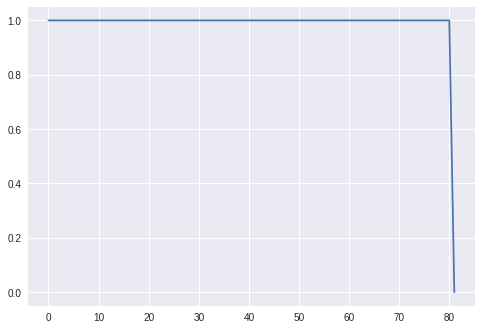

In [52]:
plt.plot(generations, conflicts)

In [41]:
# Get median run for successful experiments: 
gen_list = list(list(zip(*unsuccessful_permutation_runs))[0])
gen_list_copy = gen_list
gen_list.sort()
halfway = len(gen_list) // 2
median_gen = gen_list[halfway]
median_index = 0 
for i in range(len(unsuccessful_permutation_runs)):
  if unsuccessful_permutation_runs[i][0] == median_gen:
    median_index = i
median_convergence = unsuccessful_permutation_convergence[median_index]
generations = list(list(zip(*median_convergence))[0])
conflicts = list(list(zip(*median_convergence))[1])

IndexError: ignored

In [54]:
# Get other statistics: 

best = min(gen_list)
mean = np.average(gen_list)
std_dev = np.std(gen_list)
worst = max(gen_list)
print(best)
print(mean)
print(std_dev)
print(worst)

0
88.83333333333333
66.33304020035733
234


In [0]:
### Matrix Solution

## Parameters:
runs = 30
generations = 10000
P = 30 # Population size
N = 8 # Number of queens
S = .4 # Proportion of population that is selected each generation
pr_b = 1 # Breeding probability
pr_m = 1 # Mutation probability

## Auxiliary functions:
def evaluate(individual):
    conflicts = 0
    for i in range(N):
        row_conflicts = np.count_nonzero(individual[i])
        conflicts = conflicts + row_conflicts * (row_conflicts - 1) // 2
    for j in range(N):
        col_conflicts = np.count_nonzero(individual[:,i])
        conflicts = conflicts + col_conflicts * (col_conflicts - 1) // 2
    diagonal_conflicts = 0
    for i in range(N):
        for j in range(N):
            if individual[i][j] == 1:
                k = 1
                while i + k < N and j + k < N:
                    if individual[i][j] == individual[i + k][j + k]:
                        diagonal_conflicts += 1
                    k += 1
                k = 1
                while i - k >= 0 and j - k >= 0:
                    if individual[i][j] == individual[i - k][j - k]:
                        diagonal_conflicts += 1
                    k += 1
                k = 1
                while i - k >= 0 and j + k < N:
                    if individual[i][j] == individual[i - k][j + k]:
                        diagonal_conflicts += 1
                    k += 1
                k = 1
                while i + k < N and j - k >= 0:
                    if individual[i][j] == individual[i + k][j - k]:
                        diagonal_conflicts += 1
                    k += 1
    conflicts = conflicts + diagonal_conflicts // 2
    return conflicts

def breed(individual1, individual2):
    if np.random.uniform() < pr_b:
        individual1 = individual1.reshape(N * N)
        individual2 = individual2.reshape(N * N)
        halfway = (N * N) // 2
        offspring1 = np.concatenate([individual1[:halfway], individual2[halfway:]])
        offspring2 = np.concatenate([individual2[:halfway], individual1[halfway:]])
        offspring1 = offspring1.reshape((N,N))
        offspring2 = offspring2.reshape((N,N))
        return offspring1, offspring2
    else:
        return individual1, individual2

def sort_attacks(val):
    return val[1]

## Define function to run one generation:
def run_one_generation_matrix(population):
    # Evaluate
    conflicts = []
    for individual in population:
        conflicts.append(evaluate(individual))

    # Order by value:
    evaluated_population = list(zip(population, conflicts))
    evaluated_population.sort(key = sort_attacks)
    population = list(list(zip(*evaluated_population))[0])
    conflicts = list(list(zip(*evaluated_population))[1])
    # Assign probabilities of surival:
    fitness = []
    total_conflicts = sum(conflicts)
    for i in range(len(conflicts)):
        fitness.append((1 - sum(conflicts[:i]) / total_conflicts))


    # Select surviving population:
    total_population_data = list(zip(population, conflicts, fitness))
    survivors = []
    while len(survivors) < int(S * P) or len(survivors) % 2 != 0:
        potential_survivor = random.choice(total_population_data)
        if np.random.uniform() < potential_survivor[2]:
            survivors.append(potential_survivor[0])

    # Cross-over:
    half_survivors = len(survivors) // 2
    first_half = survivors[:half_survivors]
    second_half = survivors[half_survivors:]
    paired_survivors = list(zip(first_half, second_half))

    offspring = []

    for pair in paired_survivors:
        offspring1, offspring2 = breed(pair[0], pair[1])
        if np.array_equal(pair[0],pair[1])\
         or np.array_equal(offspring1, pair[0])\
          or np.array_equal(offspring2, pair[1]):
            offspring.append(offspring1)
            offspring.append(offspring2)

    # Repair offspring:
    for individual in offspring:
        reshaped_individual = individual.reshape(N*N)
        while np.count_nonzero(reshaped_individual) != N:
            if np.count_nonzero(reshaped_individual) > N:
                random_one_index = random.choice(np.nonzero(reshaped_individual)[0])
                reshaped_individual[random_one_index] = 0
            else:
                random_zero_index = random.choice(np.where(reshaped_individual == 0)[0])
                reshaped_individual[random_zero_index] = 1
        individual = reshaped_individual.reshape((N, N))

    # Mutate:
    for individual in offspring:
        if np.random.uniform() < pr_m:
            reshaped_individual = individual.reshape(N*N)
            random_one_index = random.choice(np.nonzero(reshaped_individual)[0])
            random_zero_index = random.choice(np.where(reshaped_individual == 0)[0])
            reshaped_individual[random_one_index] = 0
            reshaped_individual[random_zero_index] = 1
            individual = reshaped_individual.reshape((N, N))

    # Replace:
    # Join offspring, evaluate and remove the worst performing individuals

    all_population = population + offspring
    conflicts = []
    for individual in all_population:
        conflicts.append(evaluate(individual))
    evaluated_population = list(zip(all_population, conflicts))
    evaluated_population.sort(key = sort_attacks)
    population = list(list(zip(*evaluated_population))[0])
    conflicts = list(list(zip(*evaluated_population))[1])

    population = population[:P]
    conflicts = conflicts[:P]

    # Report final results:
    total_population_data = list(zip(population, conflicts))

    return total_population_data

## Main matrix solution:

def run_matrix_evolution():
    ## Create initial population
    # Random 0-1 matrices of size NxN
    array_seed = np.array([1] * N + [0] * (N * (N - 1)))
    population = []
    for i in range(P):
        np.random.shuffle(array_seed)
        individual = np.copy(array_seed.reshape((N, N)))
        population.append(individual)
    matrix_run_data = []
    for gen in range(generations):
        total_population_data = run_one_generation_matrix(population)
        population = list(list(zip(*total_population_data))[0])
        best_configuration = total_population_data[0][0]
        conflicts = total_population_data[0][1]
        matrix_run_data.append((gen, total_population_data[0][1]))
        if conflicts == 0:
            break
    return gen, best_configuration, conflicts, matrix_run_data


total_report_matrix = []
total_run_data_matrix = []
for run in range(runs):
    gen, best_configuration, conflicts, matrix_run_data = run_matrix_evolution()
    total_report_matrix.append((gen, best_configuration, conflicts))
    total_run_data_matrix.append(matrix_run_data)


In [16]:
total_report_matrix

[(322, array([[0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0]]), 0), (225, array([[1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0],
         [0, 1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0]]), 0), (306, array([[0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 1, 0, 0, 0]]), 0), (204, array([[1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0

In [17]:
total_run_data_matrix

[[(0, 4),
  (1, 4),
  (2, 4),
  (3, 4),
  (4, 4),
  (5, 4),
  (6, 4),
  (7, 4),
  (8, 4),
  (9, 4),
  (10, 4),
  (11, 4),
  (12, 4),
  (13, 4),
  (14, 4),
  (15, 4),
  (16, 2),
  (17, 2),
  (18, 2),
  (19, 2),
  (20, 2),
  (21, 2),
  (22, 2),
  (23, 2),
  (24, 2),
  (25, 2),
  (26, 2),
  (27, 2),
  (28, 2),
  (29, 2),
  (30, 2),
  (31, 2),
  (32, 2),
  (33, 2),
  (34, 2),
  (35, 2),
  (36, 2),
  (37, 2),
  (38, 2),
  (39, 2),
  (40, 2),
  (41, 2),
  (42, 2),
  (43, 2),
  (44, 2),
  (45, 2),
  (46, 2),
  (47, 2),
  (48, 2),
  (49, 2),
  (50, 2),
  (51, 2),
  (52, 2),
  (53, 2),
  (54, 2),
  (55, 2),
  (56, 2),
  (57, 2),
  (58, 2),
  (59, 2),
  (60, 2),
  (61, 2),
  (62, 2),
  (63, 2),
  (64, 2),
  (65, 2),
  (66, 2),
  (67, 2),
  (68, 2),
  (69, 2),
  (70, 2),
  (71, 2),
  (72, 2),
  (73, 2),
  (74, 2),
  (75, 2),
  (76, 2),
  (77, 2),
  (78, 2),
  (79, 2),
  (80, 2),
  (81, 2),
  (82, 2),
  (83, 2),
  (84, 2),
  (85, 2),
  (86, 2),
  (87, 2),
  (88, 2),
  (89, 2),
  (90, 2),
  (91, 2)

In [0]:
successful_matrix_runs = []
unsuccessful_matrix_runs = []
successful_matrix_convergence = []
unsuccessful_matrix_convergence = []
for id, run in enumerate(total_report_matrix): 
  if run[2] == 0:
    successful_matrix_runs.append(run)
    successful_matrix_convergence.append(total_run_data_matrix[id])
  else:
    unsuccessful_matrix_runs.append(run)
    unsuccessful_matrix_convergence.append(total_run_data_matrix[id])
    
  

In [0]:
# Get median run for successful experiments: 
gen_list = list(list(zip(*successful_matrix_runs))[0])
gen_list_copy = gen_list
gen_list.sort()
halfway = len(gen_list) // 2
median_gen = gen_list[halfway]
median_index = 0 
for i in range(len(successful_matrix_runs)):
  if successful_matrix_runs[i][0] == median_gen:
    median_index = i
median_convergence = successful_matrix_convergence[median_index]
generations = list(list(zip(*median_convergence))[0])
conflicts = list(list(zip(*median_convergence))[1])

In [49]:
median_gen

376

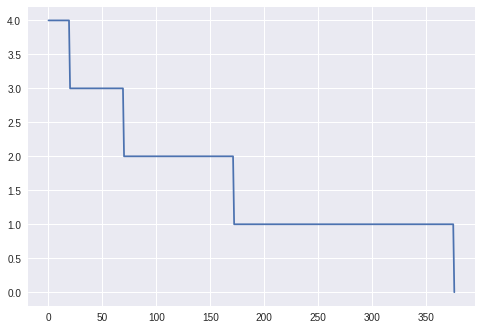

In [45]:
plt.plot(generations, conflicts)

In [46]:
# Get median run for unsuccessful experiments: 
gen_list = list(list(zip(*unsuccessful_matrix_runs))[0])
gen_list_copy = gen_list
gen_list.sort()
halfway = len(gen_list) // 2
median_gen = gen_list[halfway]
median_index = 0 
for i in range(len(unsuccessful_matrix_runs)):
  if unsuccessful_matrix_runs[i][0] == median_gen:
    median_index = i
median_convergence = unsuccessful_matrix_convergence[median_index]
generations = list(list(zip(*median_convergence))[0])
conflicts = list(list(zip(*median_convergence))[1])

IndexError: ignored

In [47]:
# Get other statistics: 

best = min(gen_list)
mean = np.average(gen_list)
std_dev = np.std(gen_list)
worst = max(gen_list)
print(best)
print(mean)
print(std_dev)
print(worst)

87
421.03333333333336
277.04361670241667
1474
